In [7]:
# Got the csv of the data from wunderground.com
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
import dateutil



In [8]:
dfWeather= pd.read_csv('Data/New_York_Hourly.csv')

In [9]:
dfWeather.head()

,date,TimeEST,TemperatureF,Dew PointF,Humidity,Wind SpeedMPH,Conditions
0,2016-01-01,12:51 AM,42.1,25.0,51.0,4.6,Overcast
1,2016-01-01,1:51 AM,41.0,25.0,53.0,3.5,Overcast
2,2016-01-01,2:51 AM,41.0,26.1,55.0,4.6,Overcast
3,2016-01-01,3:51 AM,41.0,26.1,55.0,9.2,Overcast
4,2016-01-01,4:51 AM,39.9,26.1,58.0,10.4,Overcast


In [17]:
from datetime import datetime
time = "2016-01-01 2:51 AM"
formatNew = "%Y-%m-%d %I:%M %p"
newDate = datetime.strptime(time, formatNew)

In [18]:
newDate

datetime.datetime(2016, 1, 1, 2, 51)

In [19]:
print newDate.strftime(formatNew)

2016-01-01 02:51 AM


In [21]:
dfWeather["DateTime"] = dfWeather["date"].map(str) + " " + dfWeather["TimeEST"]

In [22]:
dfWeather.head()

,date,TimeEST,TemperatureF,Dew PointF,Humidity,Wind SpeedMPH,Conditions,DateTime
0,2016-01-01,12:51 AM,42.1,25.0,51.0,4.6,Overcast,2016-01-01 12:51 AM
1,2016-01-01,1:51 AM,41.0,25.0,53.0,3.5,Overcast,2016-01-01 1:51 AM
2,2016-01-01,2:51 AM,41.0,26.1,55.0,4.6,Overcast,2016-01-01 2:51 AM
3,2016-01-01,3:51 AM,41.0,26.1,55.0,9.2,Overcast,2016-01-01 3:51 AM
4,2016-01-01,4:51 AM,39.9,26.1,58.0,10.4,Overcast,2016-01-01 4:51 AM


In [24]:
dfWeather["DateTime"] = pd.to_datetime(dfWeather.DateTime, format="%Y-%m-%d %I:%M %p")

In [25]:
dfWeather.head()

,date,TimeEST,TemperatureF,Dew PointF,Humidity,Wind SpeedMPH,Conditions,DateTime
0,2016-01-01,12:51 AM,42.1,25.0,51.0,4.6,Overcast,2016-01-01 00:51:00
1,2016-01-01,1:51 AM,41.0,25.0,53.0,3.5,Overcast,2016-01-01 01:51:00
2,2016-01-01,2:51 AM,41.0,26.1,55.0,4.6,Overcast,2016-01-01 02:51:00
3,2016-01-01,3:51 AM,41.0,26.1,55.0,9.2,Overcast,2016-01-01 03:51:00
4,2016-01-01,4:51 AM,39.9,26.1,58.0,10.4,Overcast,2016-01-01 04:51:00


In [26]:
# save to csv
dfWeather.to_csv('Data/PreWeather2016Hourly.csv')

In [27]:
dfWeather2 = pd.read_csv('Data/PreWeather2016Hourly.csv')

In [29]:
# taking a look at all the conditions
sns.set_style("whitegrid")
sns.set_color_codes("muted")

def nycweather(filename):
    with open(filename, 'r') as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            conditions = row['Conditions']
            yield conditions

count = {}
for hod in nycweather('Data/PreWeather2016Hourly.csv'):
    count[hod] = count.get(hod, 0)+1

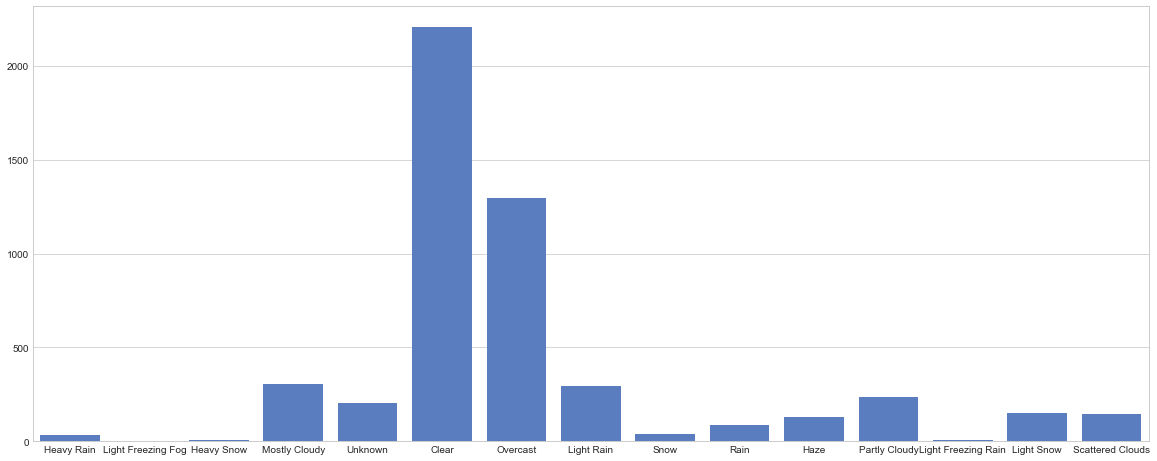

In [30]:
# looking at the weather distribution
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=count.keys(), y=count.values(), color="b", ci=None)

In [31]:
i = 6
for i, row in dfWeather2.iterrows():
    if row['Conditions'] == 'Heavy Rain':
        dfWeather2.at[i, 'Conditions'] = 'Unfavorable'
    elif row['Conditions'] == 'Light Freezing Fog':
        dfWeather2.at[i, 'Conditions'] = 'Unfavorable'
    elif row['Conditions'] == 'Heavy Snow':
        dfWeather2.at[i, 'Conditions'] = 'Unfavorable'
    elif row['Conditions'] == 'Light Rain':
        dfWeather2.at[i, 'Conditions'] = 'Unfavorable'
    elif row['Conditions'] == 'Snow':
        dfWeather2.at[i, 'Conditions'] = 'Unfavorable'
    elif row['Conditions'] == 'Rain':
        dfWeather2.at[i, 'Conditions'] = 'Unfavorable'
    elif row['Conditions'] == 'Light Freezing Rain':
        dfWeather2.at[i, 'Conditions'] = 'Unfavorable'
    elif row['Conditions'] == 'Light Snow':
        dfWeather2.at[i, 'Conditions'] = 'Unfavorable'
    else:
        dfWeather2.at[i, 'Conditions'] = 'Favorable'

In [32]:
dfWeather2.head()

,Unnamed: 0,date,TimeEST,TemperatureF,Dew PointF,Humidity,Wind SpeedMPH,Conditions,DateTime
0,0,2016-01-01,12:51 AM,42.1,25.0,51.0,4.6,Favorable,2016-01-01 00:51:00
1,1,2016-01-01,1:51 AM,41.0,25.0,53.0,3.5,Favorable,2016-01-01 01:51:00
2,2,2016-01-01,2:51 AM,41.0,26.1,55.0,4.6,Favorable,2016-01-01 02:51:00
3,3,2016-01-01,3:51 AM,41.0,26.1,55.0,9.2,Favorable,2016-01-01 03:51:00
4,4,2016-01-01,4:51 AM,39.9,26.1,58.0,10.4,Favorable,2016-01-01 04:51:00


In [33]:
dfWeather2.head(10)

,Unnamed: 0,date,TimeEST,TemperatureF,Dew PointF,Humidity,Wind SpeedMPH,Conditions,DateTime
0,0,2016-01-01,12:51 AM,42.1,25.0,51.0,4.6,Favorable,2016-01-01 00:51:00
1,1,2016-01-01,1:51 AM,41.0,25.0,53.0,3.5,Favorable,2016-01-01 01:51:00
2,2,2016-01-01,2:51 AM,41.0,26.1,55.0,4.6,Favorable,2016-01-01 02:51:00
3,3,2016-01-01,3:51 AM,41.0,26.1,55.0,9.2,Favorable,2016-01-01 03:51:00
4,4,2016-01-01,4:51 AM,39.9,26.1,58.0,10.4,Favorable,2016-01-01 04:51:00
5,5,2016-01-01,5:51 AM,39.9,26.1,58.0,6.9,Favorable,2016-01-01 05:51:00
6,6,2016-01-01,6:51 AM,39.0,26.1,60.0,Calm,Favorable,2016-01-01 06:51:00
7,7,2016-01-01,7:51 AM,39.0,25.0,57.0,6.9,Favorable,2016-01-01 07:51:00
8,8,2016-01-01,8:51 AM,39.0,24.1,55.0,6.9,Favorable,2016-01-01 08:51:00
9,9,2016-01-01,9:51 AM,39.9,25.0,55.0,4.6,Favorable,2016-01-01 09:51:00


In [34]:
dfWeather2.head(20)

,Unnamed: 0,date,TimeEST,TemperatureF,Dew PointF,Humidity,Wind SpeedMPH,Conditions,DateTime
0,0,2016-01-01,12:51 AM,42.1,25.0,51.0,4.6,Favorable,2016-01-01 00:51:00
1,1,2016-01-01,1:51 AM,41.0,25.0,53.0,3.5,Favorable,2016-01-01 01:51:00
2,2,2016-01-01,2:51 AM,41.0,26.1,55.0,4.6,Favorable,2016-01-01 02:51:00
3,3,2016-01-01,3:51 AM,41.0,26.1,55.0,9.2,Favorable,2016-01-01 03:51:00
4,4,2016-01-01,4:51 AM,39.9,26.1,58.0,10.4,Favorable,2016-01-01 04:51:00
5,5,2016-01-01,5:51 AM,39.9,26.1,58.0,6.9,Favorable,2016-01-01 05:51:00
6,6,2016-01-01,6:51 AM,39.0,26.1,60.0,Calm,Favorable,2016-01-01 06:51:00
7,7,2016-01-01,7:51 AM,39.0,25.0,57.0,6.9,Favorable,2016-01-01 07:51:00
8,8,2016-01-01,8:51 AM,39.0,24.1,55.0,6.9,Favorable,2016-01-01 08:51:00
9,9,2016-01-01,9:51 AM,39.9,25.0,55.0,4.6,Favorable,2016-01-01 09:51:00


In [35]:
newDate.hour

2

In [37]:
dfWeather2["HourOfDay"] = pd.to_datetime(dfWeather2.DateTime, format="%Y-%m-%d %H:%M:%S")

In [38]:
dfWeather2.head()

,Unnamed: 0,date,TimeEST,TemperatureF,Dew PointF,Humidity,Wind SpeedMPH,Conditions,DateTime,HourOfDay
0,0,2016-01-01,12:51 AM,42.1,25.0,51.0,4.6,Favorable,2016-01-01 00:51:00,2016-01-01 00:51:00
1,1,2016-01-01,1:51 AM,41.0,25.0,53.0,3.5,Favorable,2016-01-01 01:51:00,2016-01-01 01:51:00
2,2,2016-01-01,2:51 AM,41.0,26.1,55.0,4.6,Favorable,2016-01-01 02:51:00,2016-01-01 02:51:00
3,3,2016-01-01,3:51 AM,41.0,26.1,55.0,9.2,Favorable,2016-01-01 03:51:00,2016-01-01 03:51:00
4,4,2016-01-01,4:51 AM,39.9,26.1,58.0,10.4,Favorable,2016-01-01 04:51:00,2016-01-01 04:51:00


In [40]:
dfWeather2["HourOfDay"] = dfWeather2["HourOfDay"].dt.hour

In [44]:
dfWeather2.head(5)

,Unnamed: 0,date,TimeEST,TemperatureF,Dew PointF,Humidity,Wind SpeedMPH,Conditions,DateTime,HourOfDay
0,0,2016-01-01,12:51 AM,42.1,25.0,51.0,4.6,Favorable,2016-01-01 00:51:00,0
1,1,2016-01-01,1:51 AM,41.0,25.0,53.0,3.5,Favorable,2016-01-01 01:51:00,1
2,2,2016-01-01,2:51 AM,41.0,26.1,55.0,4.6,Favorable,2016-01-01 02:51:00,2
3,3,2016-01-01,3:51 AM,41.0,26.1,55.0,9.2,Favorable,2016-01-01 03:51:00,3
4,4,2016-01-01,4:51 AM,39.9,26.1,58.0,10.4,Favorable,2016-01-01 04:51:00,4


In [52]:
dfWeather2 = dfWeather2.drop(['TemperatureF'], axis=1)

In [53]:
dfWeather2 = dfWeather2.drop(['Dew PointF'], axis=1)
dfWeather2 = dfWeather2.drop(['Humidity'], axis=1)
dfWeather2 = dfWeather2.drop(['Wind SpeedMPH'], axis=1)

In [54]:
dfWeather2.head()

,Unnamed: 0,date,TimeEST,Conditions,DateTime,HourOfDay
0,0,2016-01-01,12:51 AM,Favorable,2016-01-01 00:51:00,0
1,1,2016-01-01,1:51 AM,Favorable,2016-01-01 01:51:00,1
2,2,2016-01-01,2:51 AM,Favorable,2016-01-01 02:51:00,2
3,3,2016-01-01,3:51 AM,Favorable,2016-01-01 03:51:00,3
4,4,2016-01-01,4:51 AM,Favorable,2016-01-01 04:51:00,4


In [55]:
dfWeather2.to_csv('Data/FinalWeather2016Hourly.csv')